In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from catboost import CatBoostClassifier
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

In [2]:
# A lot of bandgap values in the dataset are '0' corresponding to conductors 

# two-step approach: a classifier predicts whether the bandgap is 0 or > 0, and a regressor predicts the bandgap if > 0

# try on reduced features for now, if poor classifier performance reclassify feature importance. could be worth doing anyway incase differences in feature importance for tasks. 

# 1. encode dataset for classifier 
# 2. train classifier 
# 3. prep dataset for regressor (remove all '0' values)
# 4. train regressor 
# 5. somehow make them all work together 



In [41]:
# load experimental data into pandas dataframe

df = pd.read_csv("expt_bandgap_dataset.csv")
df = df.drop(['formula'],axis=1)



In [42]:
# add zero-filled column in dataframe, change val to 1 if 'gap expt' > 0

df['class binary'] = 0
df['class binary'] = (df['gap expt'] > 0).astype(int)


In [43]:
# access 34 important features 

important_features = ['MagpieData maximum MendeleevNumber', 'MagpieData mean AtomicWeight',
       'MagpieData minimum MeltingT', 'MagpieData maximum MeltingT',
       'MagpieData mean MeltingT', 'MagpieData minimum Column',
       'MagpieData range Column', 'MagpieData avg_dev Column',
       'MagpieData mode Column', 'MagpieData range Row', 'MagpieData mean Row',
       'MagpieData range Electronegativity',
       'MagpieData avg_dev Electronegativity',
       'MagpieData mode Electronegativity', 'MagpieData mean NpValence',
       'MagpieData maximum NdValence', 'MagpieData range NdValence',
       'MagpieData mean NdValence', 'MagpieData maximum NfValence',
       'MagpieData mean NfValence', 'MagpieData mean NValence',
       'MagpieData mode NValence', 'MagpieData maximum NpUnfilled',
       'MagpieData range NpUnfilled', 'MagpieData mean NpUnfilled',
       'MagpieData range NUnfilled', 'MagpieData mean NUnfilled',
       'MagpieData mode NUnfilled', 'MagpieData minimum GSvolume_pa',
       'MagpieData mode GSvolume_pa', 'MagpieData maximum GSbandgap',
       'MagpieData range GSbandgap', 'MagpieData mode GSbandgap',
       'MagpieData mean GSmagmom', 'MagpieData mode SpaceGroupNumber']

X = df.drop(["gap expt","class binary"], axis=1).values

y = df['class binary'].values
y = y.reshape(-1,1)



In [14]:
# train model

catboost_classifier = CatBoostClassifier(random_state=42)

# use accuracy instead of mae 

scores = cross_val_score(catboost_classifier, X, y, cv=5, scoring="accuracy")
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Learning rate set to 0.017976
0:	learn: 0.6789825	total: 185ms	remaining: 3m 5s
1:	learn: 0.6634482	total: 199ms	remaining: 1m 39s
2:	learn: 0.6485001	total: 211ms	remaining: 1m 10s
3:	learn: 0.6347506	total: 228ms	remaining: 56.7s
4:	learn: 0.6223506	total: 240ms	remaining: 47.7s
5:	learn: 0.6094740	total: 250ms	remaining: 41.5s
6:	learn: 0.5958934	total: 263ms	remaining: 37.3s
7:	learn: 0.5839535	total: 274ms	remaining: 34s
8:	learn: 0.5718400	total: 284ms	remaining: 31.3s
9:	learn: 0.5614148	total: 296ms	remaining: 29.3s
10:	learn: 0.5514826	total: 306ms	remaining: 27.5s
11:	learn: 0.5408202	total: 317ms	remaining: 26.1s
12:	learn: 0.5323717	total: 328ms	remaining: 24.9s
13:	learn: 0.5237822	total: 339ms	remaining: 23.9s
14:	learn: 0.5156863	total: 349ms	remaining: 22.9s
15:	learn: 0.5065566	total: 359ms	remaining: 22.1s
16:	learn: 0.4981303	total: 370ms	remaining: 21.4s
17:	learn: 0.4910293	total: 381ms	remaining: 20.8s
18:	learn: 0.4836639	total: 392ms	remaining: 20.3s
19:	learn: 

In [15]:
# tune hyperparameters, same as regressor but change mae for accuracy 

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

random_search = RandomizedSearchCV(
    catboost_classifier, param_dist, n_iter=10, cv=5, random_state=42
)

random_search.fit(X, y)

print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best accuracy: {random_search.best_score_:.2f}")

0:	learn: 0.6233402	total: 4.31ms	remaining: 427ms
1:	learn: 0.5665455	total: 9.2ms	remaining: 451ms
2:	learn: 0.5274597	total: 14.3ms	remaining: 462ms
3:	learn: 0.5012834	total: 18.1ms	remaining: 434ms
4:	learn: 0.4705961	total: 21.9ms	remaining: 417ms
5:	learn: 0.4484547	total: 26ms	remaining: 407ms
6:	learn: 0.4308772	total: 30ms	remaining: 399ms
7:	learn: 0.4146376	total: 34ms	remaining: 391ms
8:	learn: 0.4051353	total: 38.5ms	remaining: 389ms
9:	learn: 0.3919765	total: 42.7ms	remaining: 385ms
10:	learn: 0.3815841	total: 47.3ms	remaining: 383ms
11:	learn: 0.3733557	total: 51.5ms	remaining: 378ms
12:	learn: 0.3660256	total: 57.1ms	remaining: 382ms
13:	learn: 0.3568010	total: 62.2ms	remaining: 382ms
14:	learn: 0.3503057	total: 66.5ms	remaining: 377ms
15:	learn: 0.3471622	total: 70.6ms	remaining: 371ms
16:	learn: 0.3425091	total: 75.4ms	remaining: 368ms
17:	learn: 0.3376276	total: 79.7ms	remaining: 363ms
18:	learn: 0.3340922	total: 83.9ms	remaining: 358ms
19:	learn: 0.3298895	total: 8

In [16]:
# sightly better

xgb_classifier = XGBClassifier(subsample=0.8, n_estimators=200, max_depth=5, learning_rate=0.3, random_state=42)

scores = cross_val_score(xgb_classifier, X, y, cv=5, scoring="accuracy")
print(f"Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Accuracy: 0.90 (+/- 0.02)


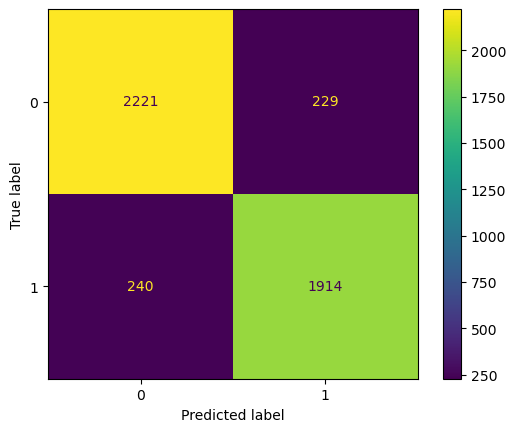

In [ ]:
y_pred = cross_val_predict(xgb_classifier, X, y, cv=5)

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()

plt.show()

In [47]:
# now to train a regressor 

# only use values where 'class encoded' != 0

df = df[df['class binary'] != 0]
X = df.drop(["gap expt","class binary"], axis=1).values
y = df['gap expt'].values

In [23]:
#XGBoost without tuning

xgb_model = XGBRegressor(random_state=42)

scores = cross_val_score(xgb_model, X, y, cv=5, scoring="neg_mean_absolute_error")
mae_scores = -scores
mae_scores
print(f"Mean absolute error: {mae_scores.mean():.2f} (+/- {mae_scores.std() * 2:.2f})")

Mean absolute error: 0.50 (+/- 0.05)


In [24]:
# tune hyperparameters
# this approach uses randomsearch which randomly goes through combinations of parameters
# for different datasets different tuning methods may be better
# BO - best for slow training (large dataset) and want to minimise the number of times you train
# grid search - best for small hyperparameter space

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

random_search = RandomizedSearchCV(
    xgb_model, param_dist, n_iter=10, cv=5, random_state=42
)

random_search.fit(X, y)

print(f"Best hyperparameters: {random_search.best_params_}")
print(f"Best mean absolute error: {-random_search.best_score_:.2f}")

Best hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}
Best mean absolute error: -0.78


In [48]:
# tuning hyperparameters does not significantly improve mae - indictive of reaching predictive limit on smaller subset of data? 
# note: have tried on all features, gives same performance once hyperparameters are tuned. so reduced features are fine for this 

xgb_model = XGBRegressor(subsample=0.8, n_estimators=200, max_depth=7, learning_rate=0.1,random_state=42)

scores = cross_val_score(xgb_model, X, y, cv=5, scoring="neg_mean_absolute_error")
mae_scores = -scores
mae_scores
print(f"Mean absolute error: {mae_scores.mean():.2f} (+/- {mae_scores.std() * 2:.2f})")

Mean absolute error: 0.47 (+/- 0.04)


Text(0.5, 1.0, 'Actual by predicted')

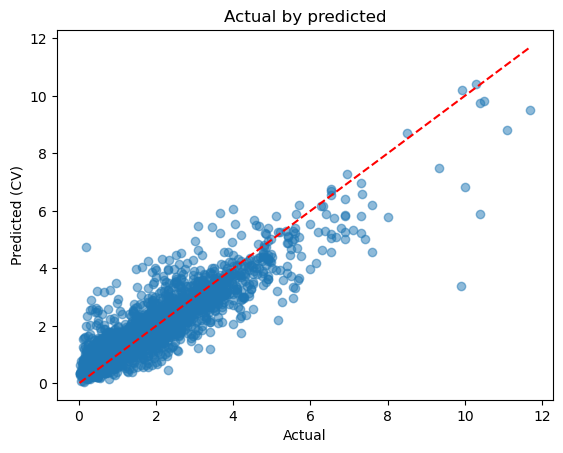

In [49]:
from sklearn.model_selection import cross_val_predict

# predictions using CV
y_pred = cross_val_predict(xgb_model, X, y, cv=5)

# actual by predicted plot
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted (CV)')
plt.title('Actual by predicted')

In [ ]:
df = pd.read_csv("expt_bandgap_dataset.csv")
df = df.drop(['formula'],axis=1)

X = df.drop(["gap expt"], axis=1).values
y = df['gap expt'].values

In [31]:
# we have a classifier and a regressor, now we need to combine them...
# bundle into class?

class TwoStepModel:
    """"class to combine classifier and regressor models into one model"""

    def __init__(self,classifier,regressor):
        self.classifier = classifier
        self.regressor = regressor

    # need this for cross validation so sklearn can call the model params for each fold 
    def get_params(self, deep=True):
        return {
            'classifier': self.classifier,
            'regressor': self.regressor}

    def fit(self, X_train, y_train):
        """pass in X_train and y_train as pandas dataframes and fit models"""
        y_binary = (y_train > 0).astype(int)
        self.classifier.fit(X_train, y_binary)

        # mask to filter all y values that are non zero
        mask = y_train > 0
        self.regressor.fit(X_train[mask],y_train[mask])
        
        return self 

    def predict(self,X_test):
        """pass in X_test to get y_pred"""
        # give array populated by '0' and '1':
        binary_predictions  = self.classifier.predict(X_test)

        # create correct shape array populated by zeros:
        y_pred = np.zeros(len(X_test))

        # which predictions are '1'?
        mask = binary_predictions == 1  
        
        # how can i match the values up? i have a numpy array of binary values 
        # make another array with all self.regressor.predict(X) values
        # use mask to fill in relevent values from regressor preds into final y_pred

        regressor_pred = self.regressor.predict(X_test)
        y_pred[mask] = regressor_pred[mask]

        return(y_pred)


In [32]:
# call the new class and perform cross-validation to assess performance: 

model = TwoStepModel(XGBClassifier(subsample=0.8, n_estimators=300, max_depth=7, learning_rate=0.3, random_state=42),
                     XGBRegressor(subsample=0.8, n_estimators=200, max_depth=7, learning_rate=0.1,random_state=42)
                    )

scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
mae_scores = -scores
print(f"Mean absolute error: {mae_scores.mean():.2f} (+/- {mae_scores.std() * 2:.2f})")

Mean absolute error: 0.40 (+/- 0.11)


Text(0.5, 1.0, 'Actual by predicted')

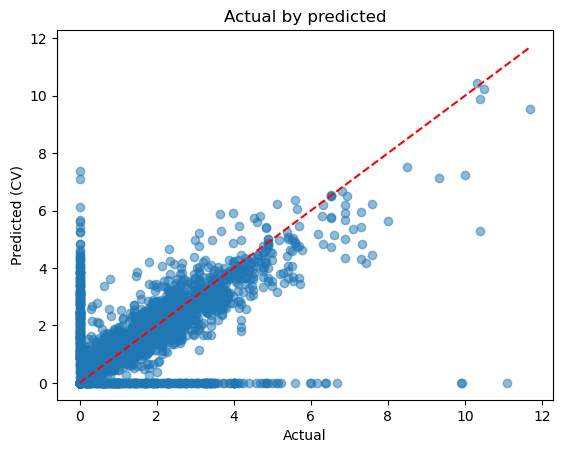

In [ ]:


# predictions using CV
y_pred = cross_val_predict(model, X, y, cv=5)

# actual by predicted plot
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted (CV)')
plt.title('Actual by predicted')

Text(0.5, 1.0, 'Residual Plot')

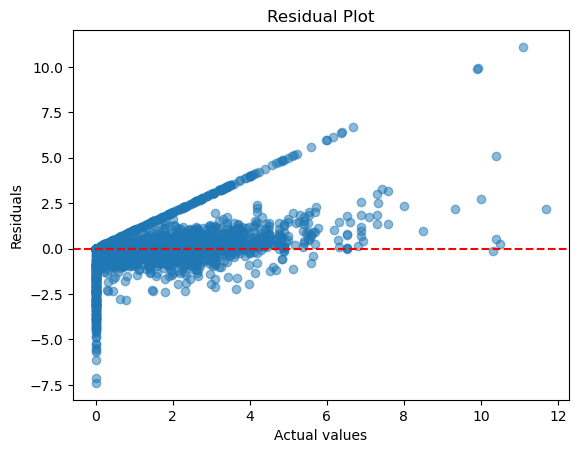

In [36]:
residuals = y - y_pred
plt.scatter(y, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Residuals')
plt.title('Residual Plot')